# Wine Quality Prediction

Machine Learning model to predict the quality of wine using linear regression only Jupyter notebook code.

Dataset link-https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

# Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
df=pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All 12 columns are numerical columns

### Checking for null values

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no null values present in the dataset

### Checking the datatypes

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All columns except quality are float64 and qulaity is int64 type.

### Description of columns

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- 1.The mean fixed acidity is 8.319
- 2.The min and max fixed acidity is 4.6 and 15.9 respectively.
- 3.The mean citric acid in wine is 0.270
- 4.The mean residual sugar in wine is 2.53.
- 5.The mean pH value of wine is 3.311
- 6.The min and max pH value of wine is 2.74 and 4.01 respectively.
- 7.The mean quality of the wine is 5.6360
- 8.The min and max quality of the wine is 3 and 8 respectively.

## Exploratory Data Anaysis

### Checking for numerical columns

In [8]:
df_num=df.select_dtypes(include=np.number).columns
df_num

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

All columns are numericals

### Checking for categorical columns

In [9]:
df_cat=df.select_dtypes(include='object').columns
df_cat

Index([], dtype='object')

There are no categorical columns

## Univariate Analysis

### KDE(Kernel Density Estimate Plot)

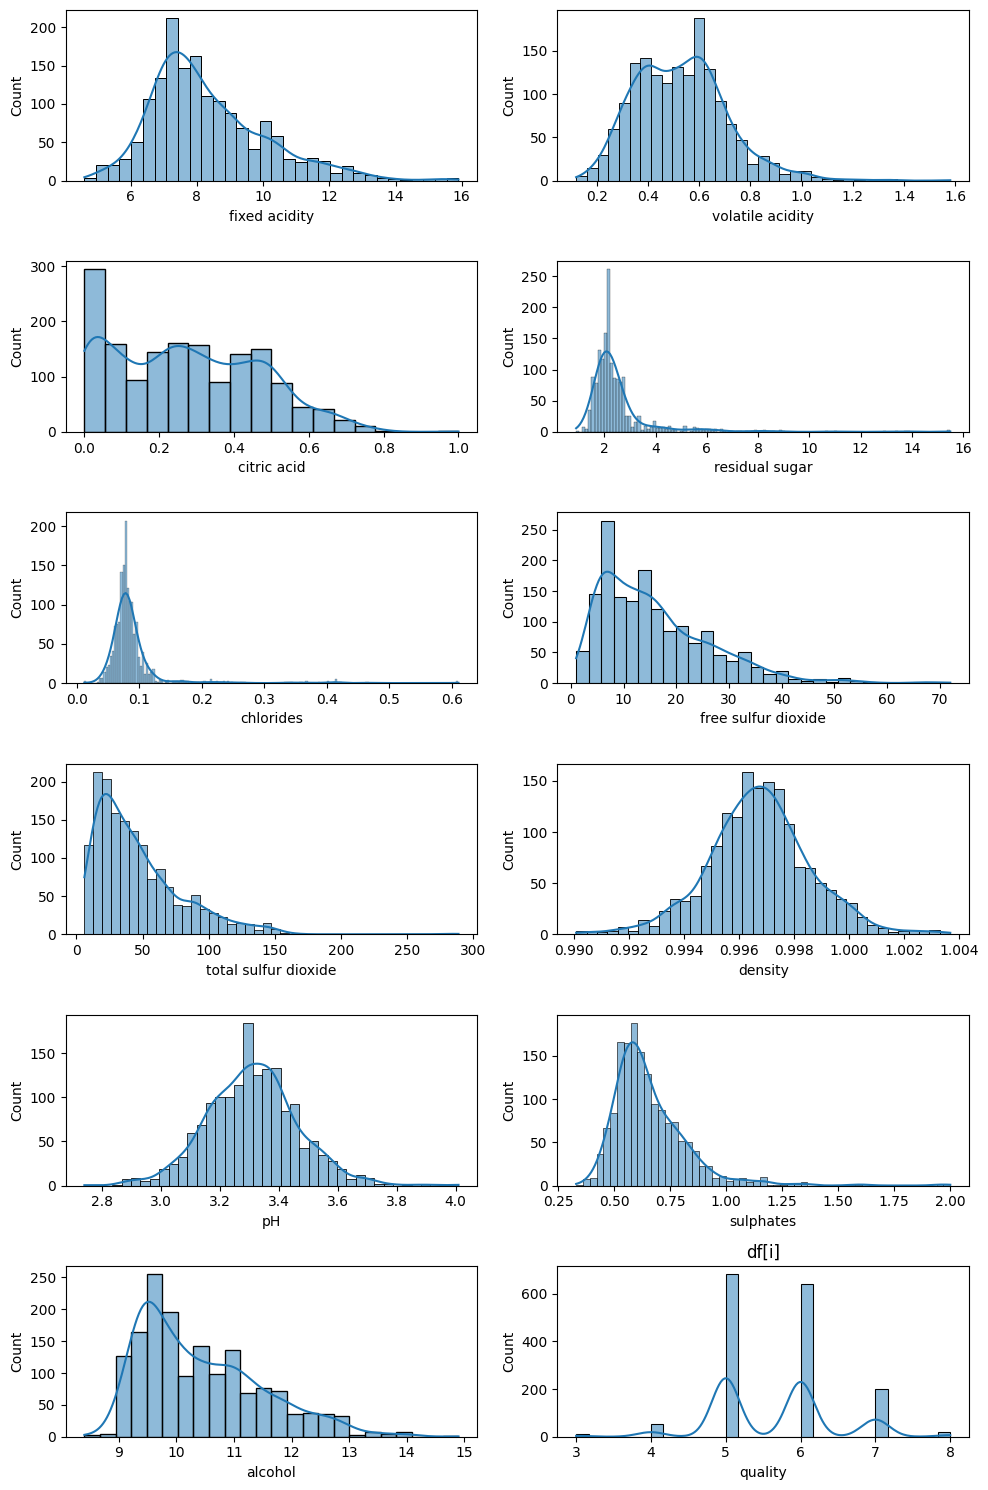

CPU times: total: 3.19 s
Wall time: 5.23 s


In [10]:
%%time
fig, ax= plt.subplots(6,2, figsize=(10,15))

for i, subplot in zip(df_num, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

- 1.Most of the wine is of quality 5 and second most is of 6.
- 2.pH value of most wine is around 3.3 on pH scale.
- 3.Most of the wine is of 0.9965 density.

### Histogram

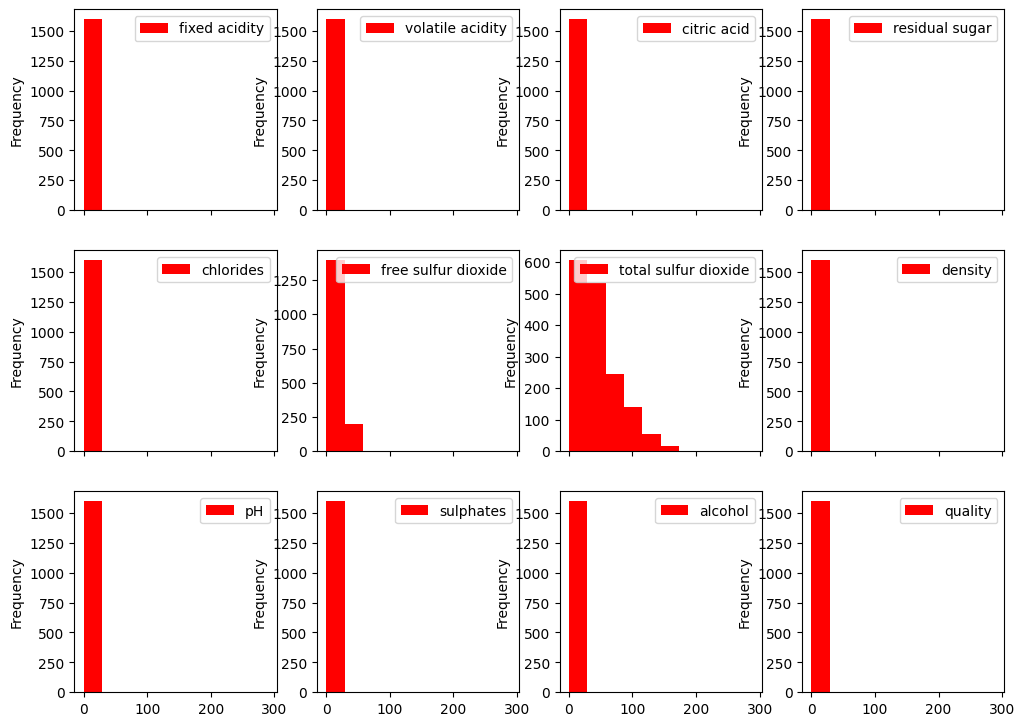

In [11]:
df.plot(kind='hist',figsize=(12,12),color='red',layout=(4,4),subplots=True,sharey=False);
plt.show();

### Checking for outliers through Boxplots

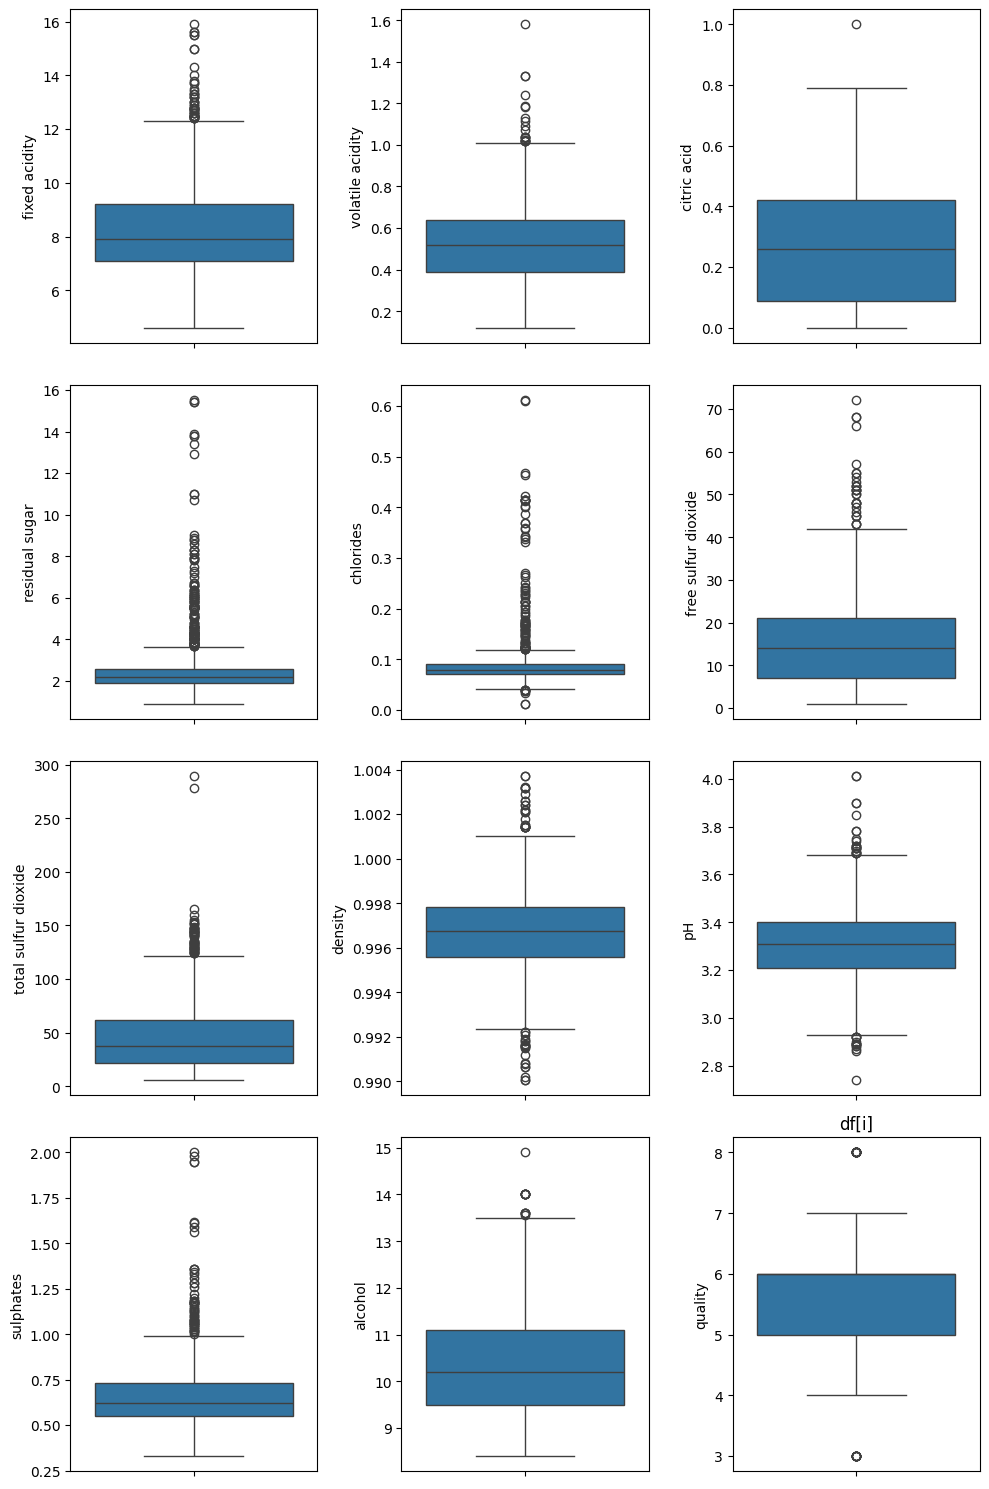

In [12]:
fig, ax= plt.subplots(4,3, figsize=(10,15))

for i, subplot in zip(df_num, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

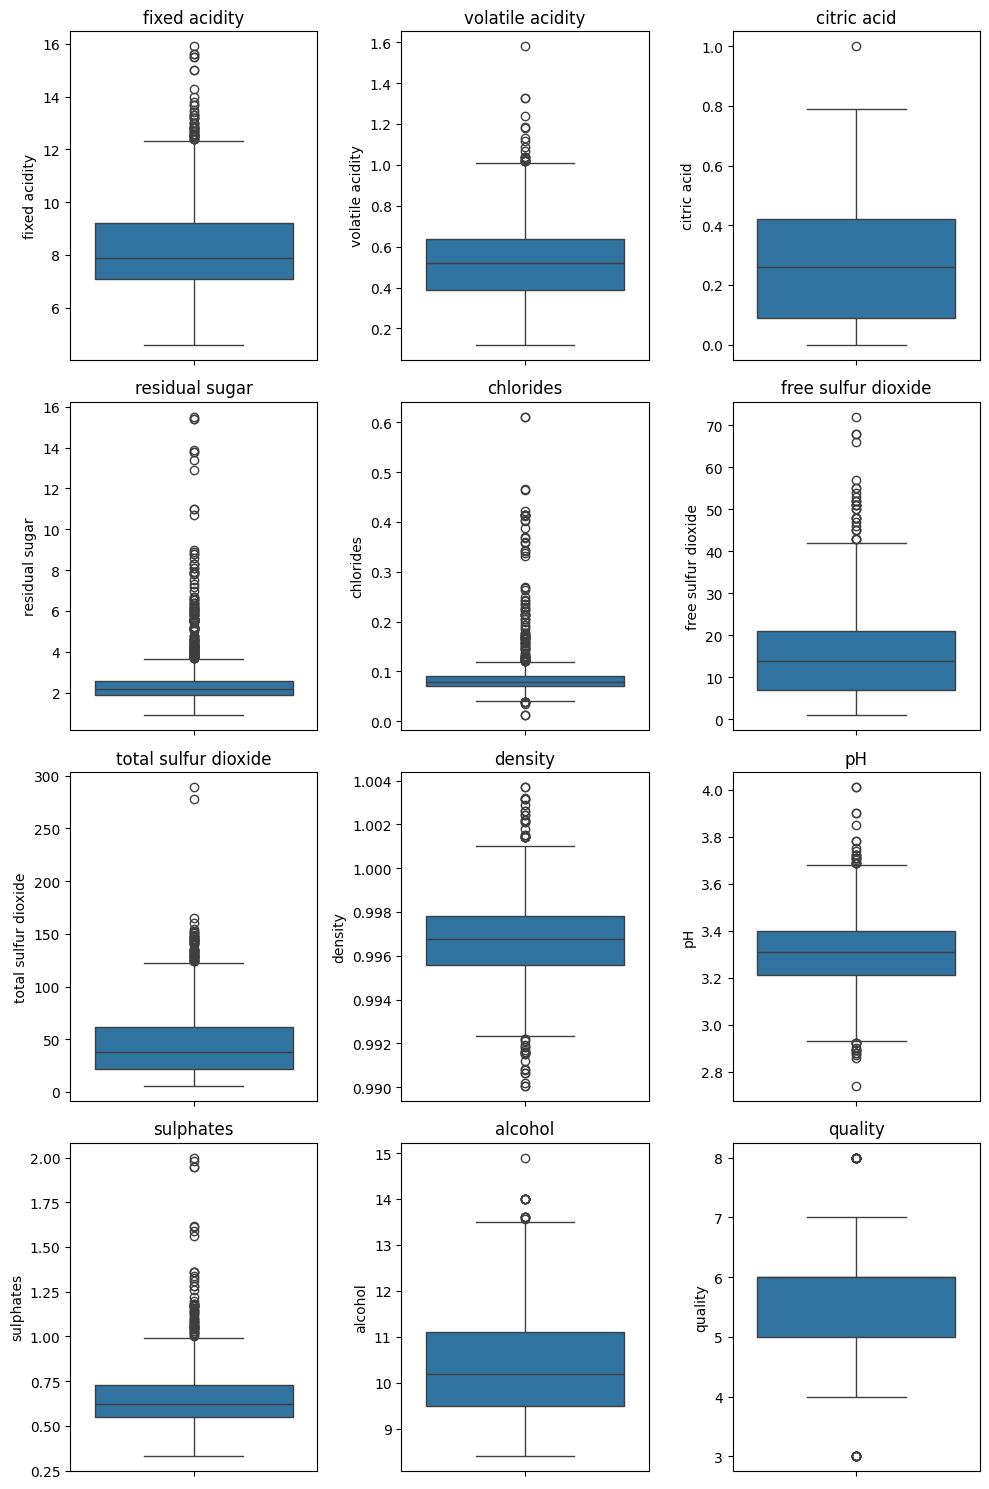

In [13]:
#OR
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 3, figsize=(10, 15))

for i, subplot in zip(df_num, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    subplot.set_title(i)  # Set the title of the subplot to the column name

plt.tight_layout()
plt.show()


All the variables have outliers and they need to be treated

## Bivariate Analysis

### Scatter Plot

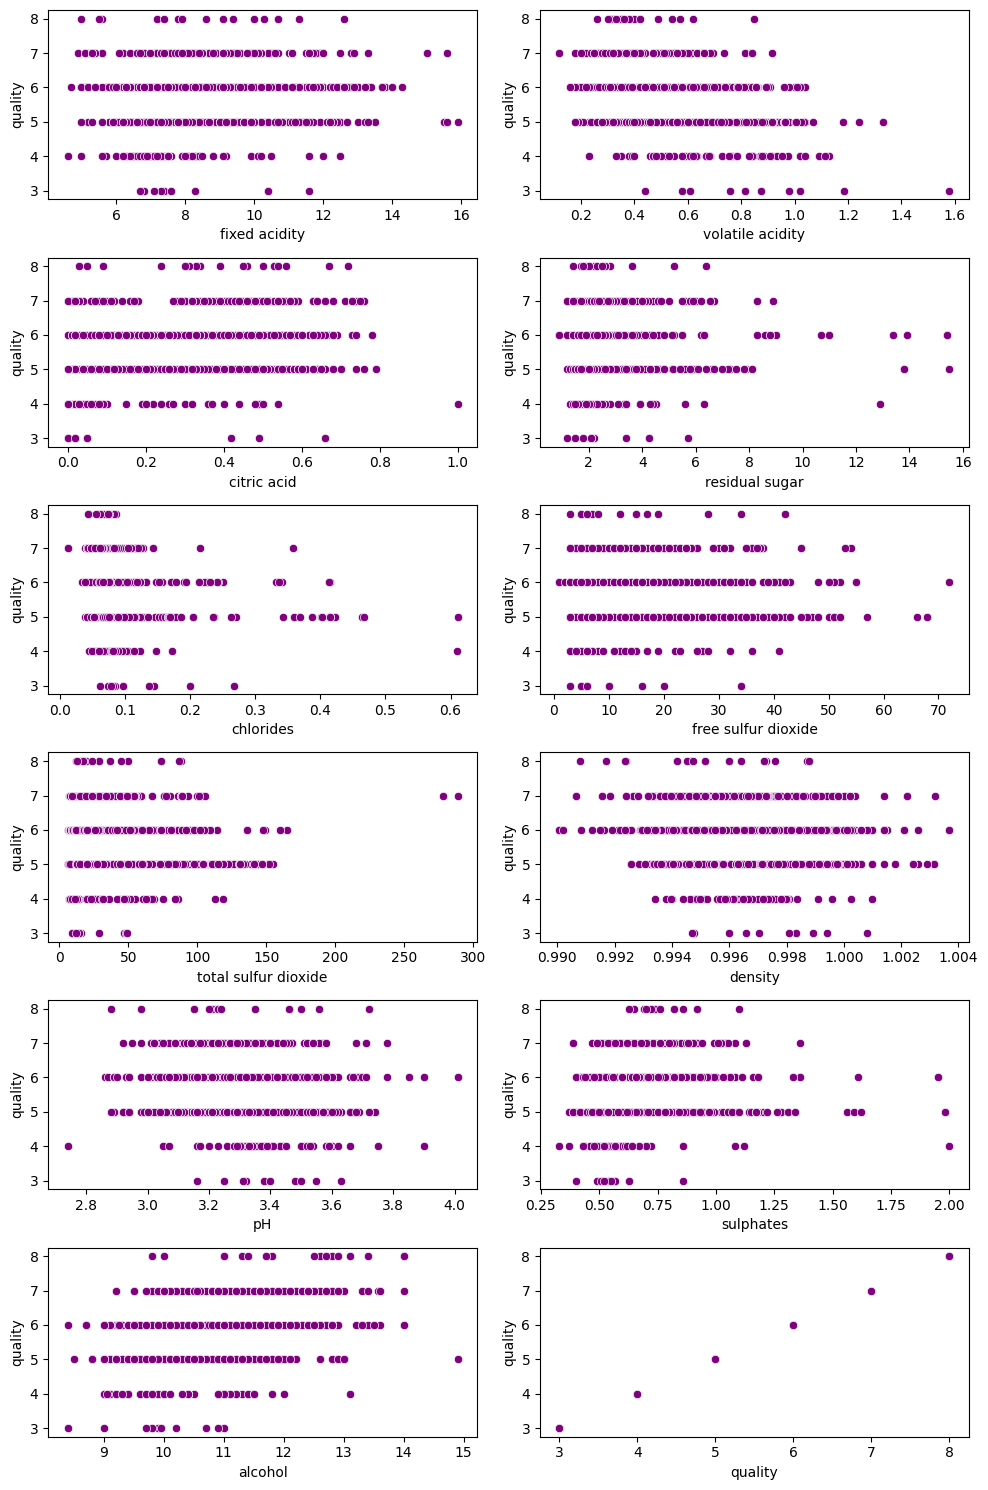

In [14]:
fig, ax= plt.subplots(6,2, figsize=(10,15))

for i, subplot in zip(df_num, ax.flatten()):
    sns.scatterplot(x=df[i],y=df['quality'], ax=subplot,color='purple')
    

plt.tight_layout()
plt.show()

### Heatmap

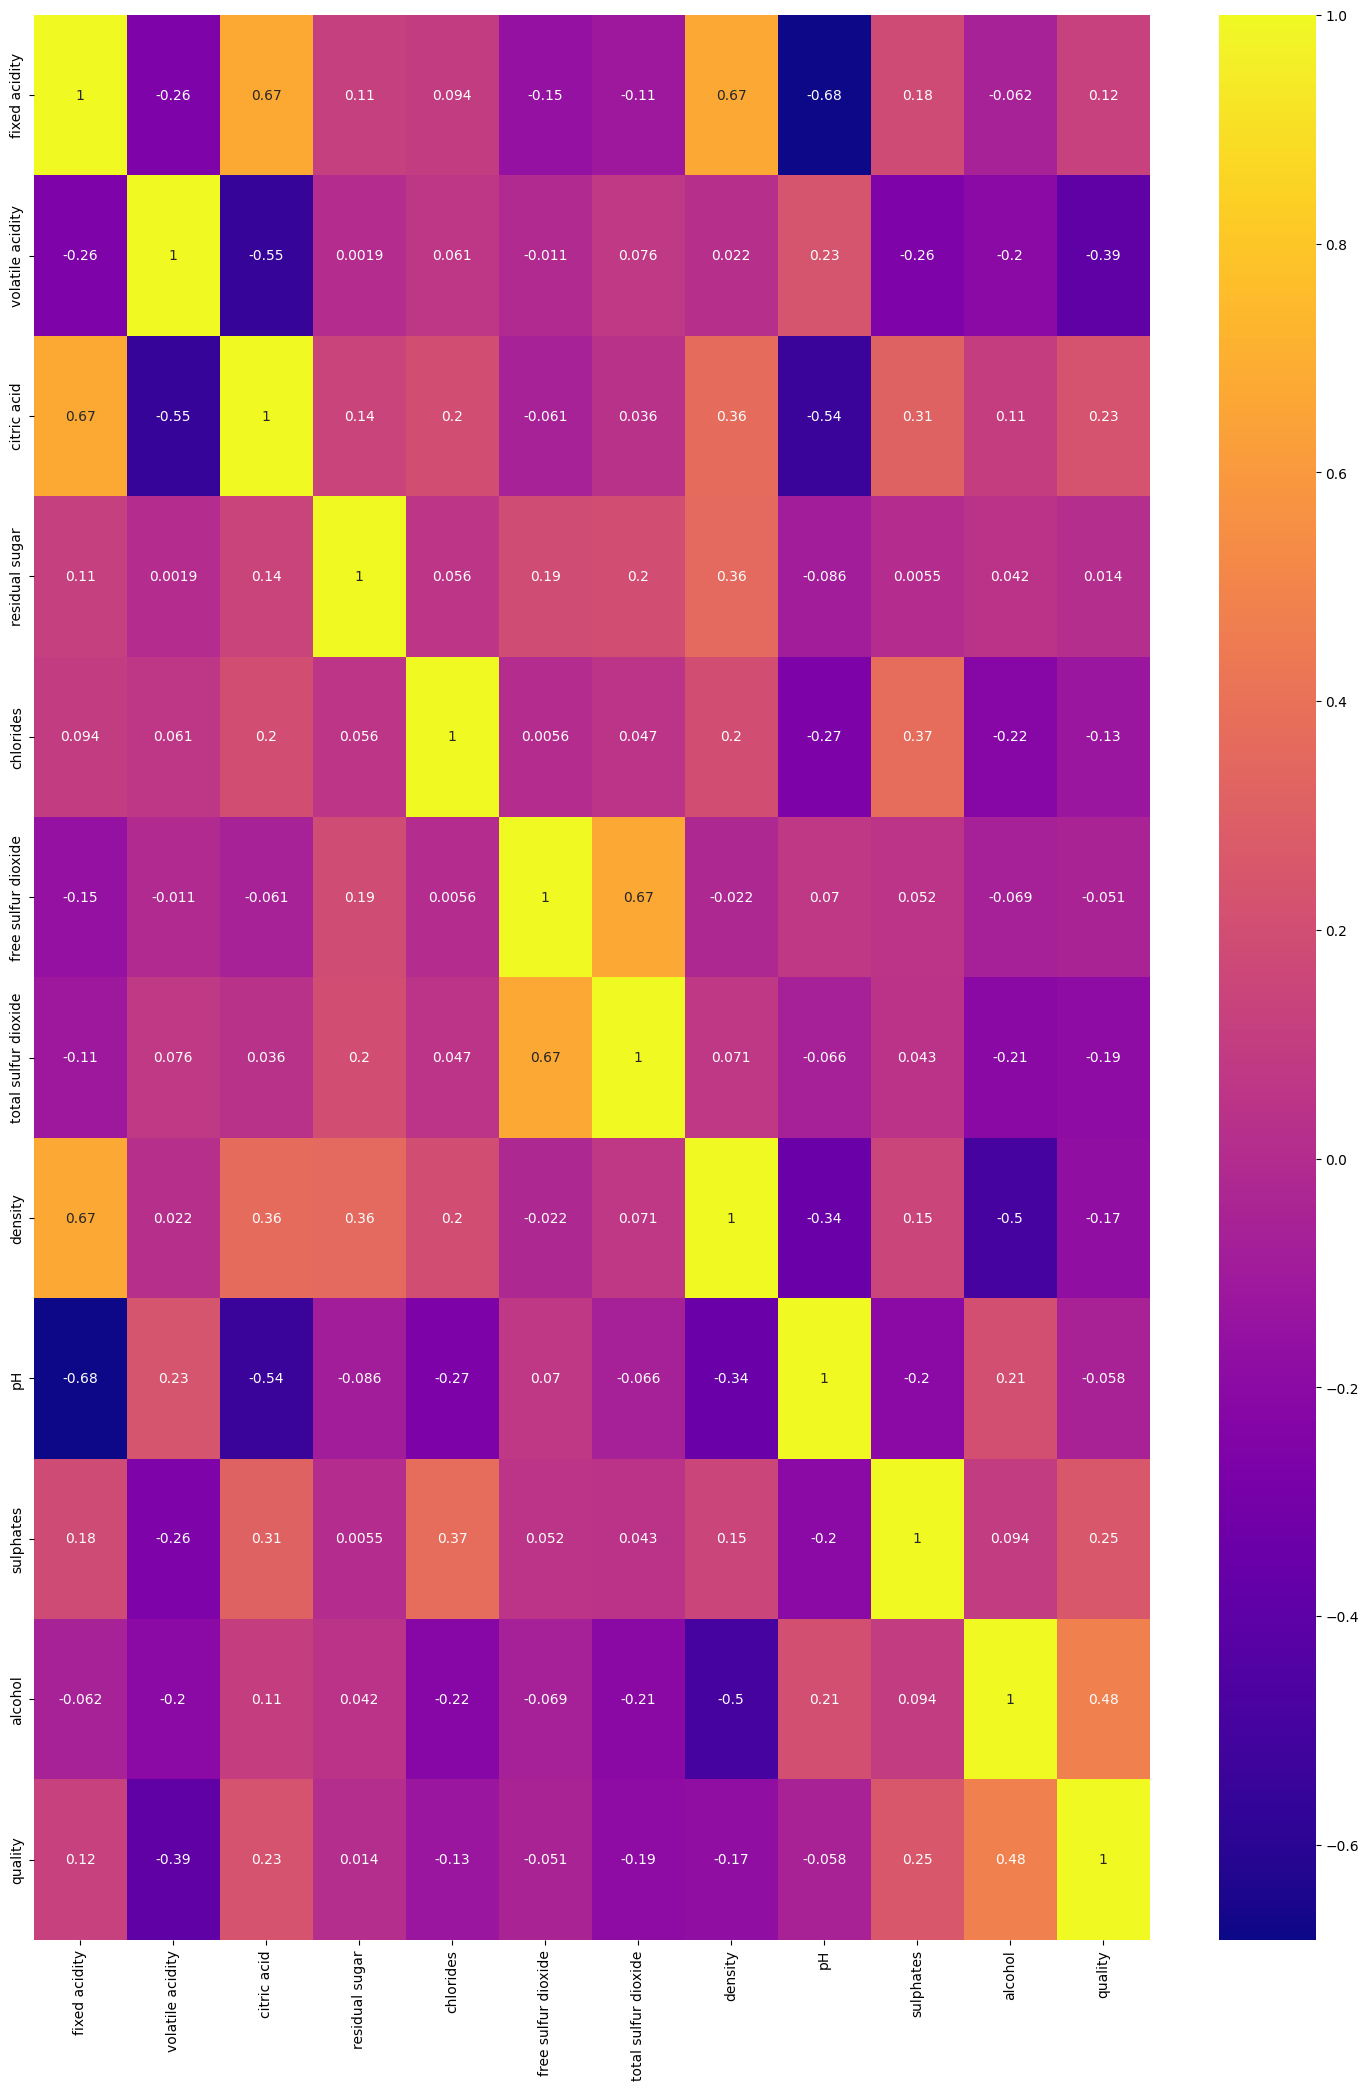

In [15]:
plt.figure(figsize=(18,25))
sns.heatmap(df.corr(),annot=True,cmap='plasma')
plt.show()

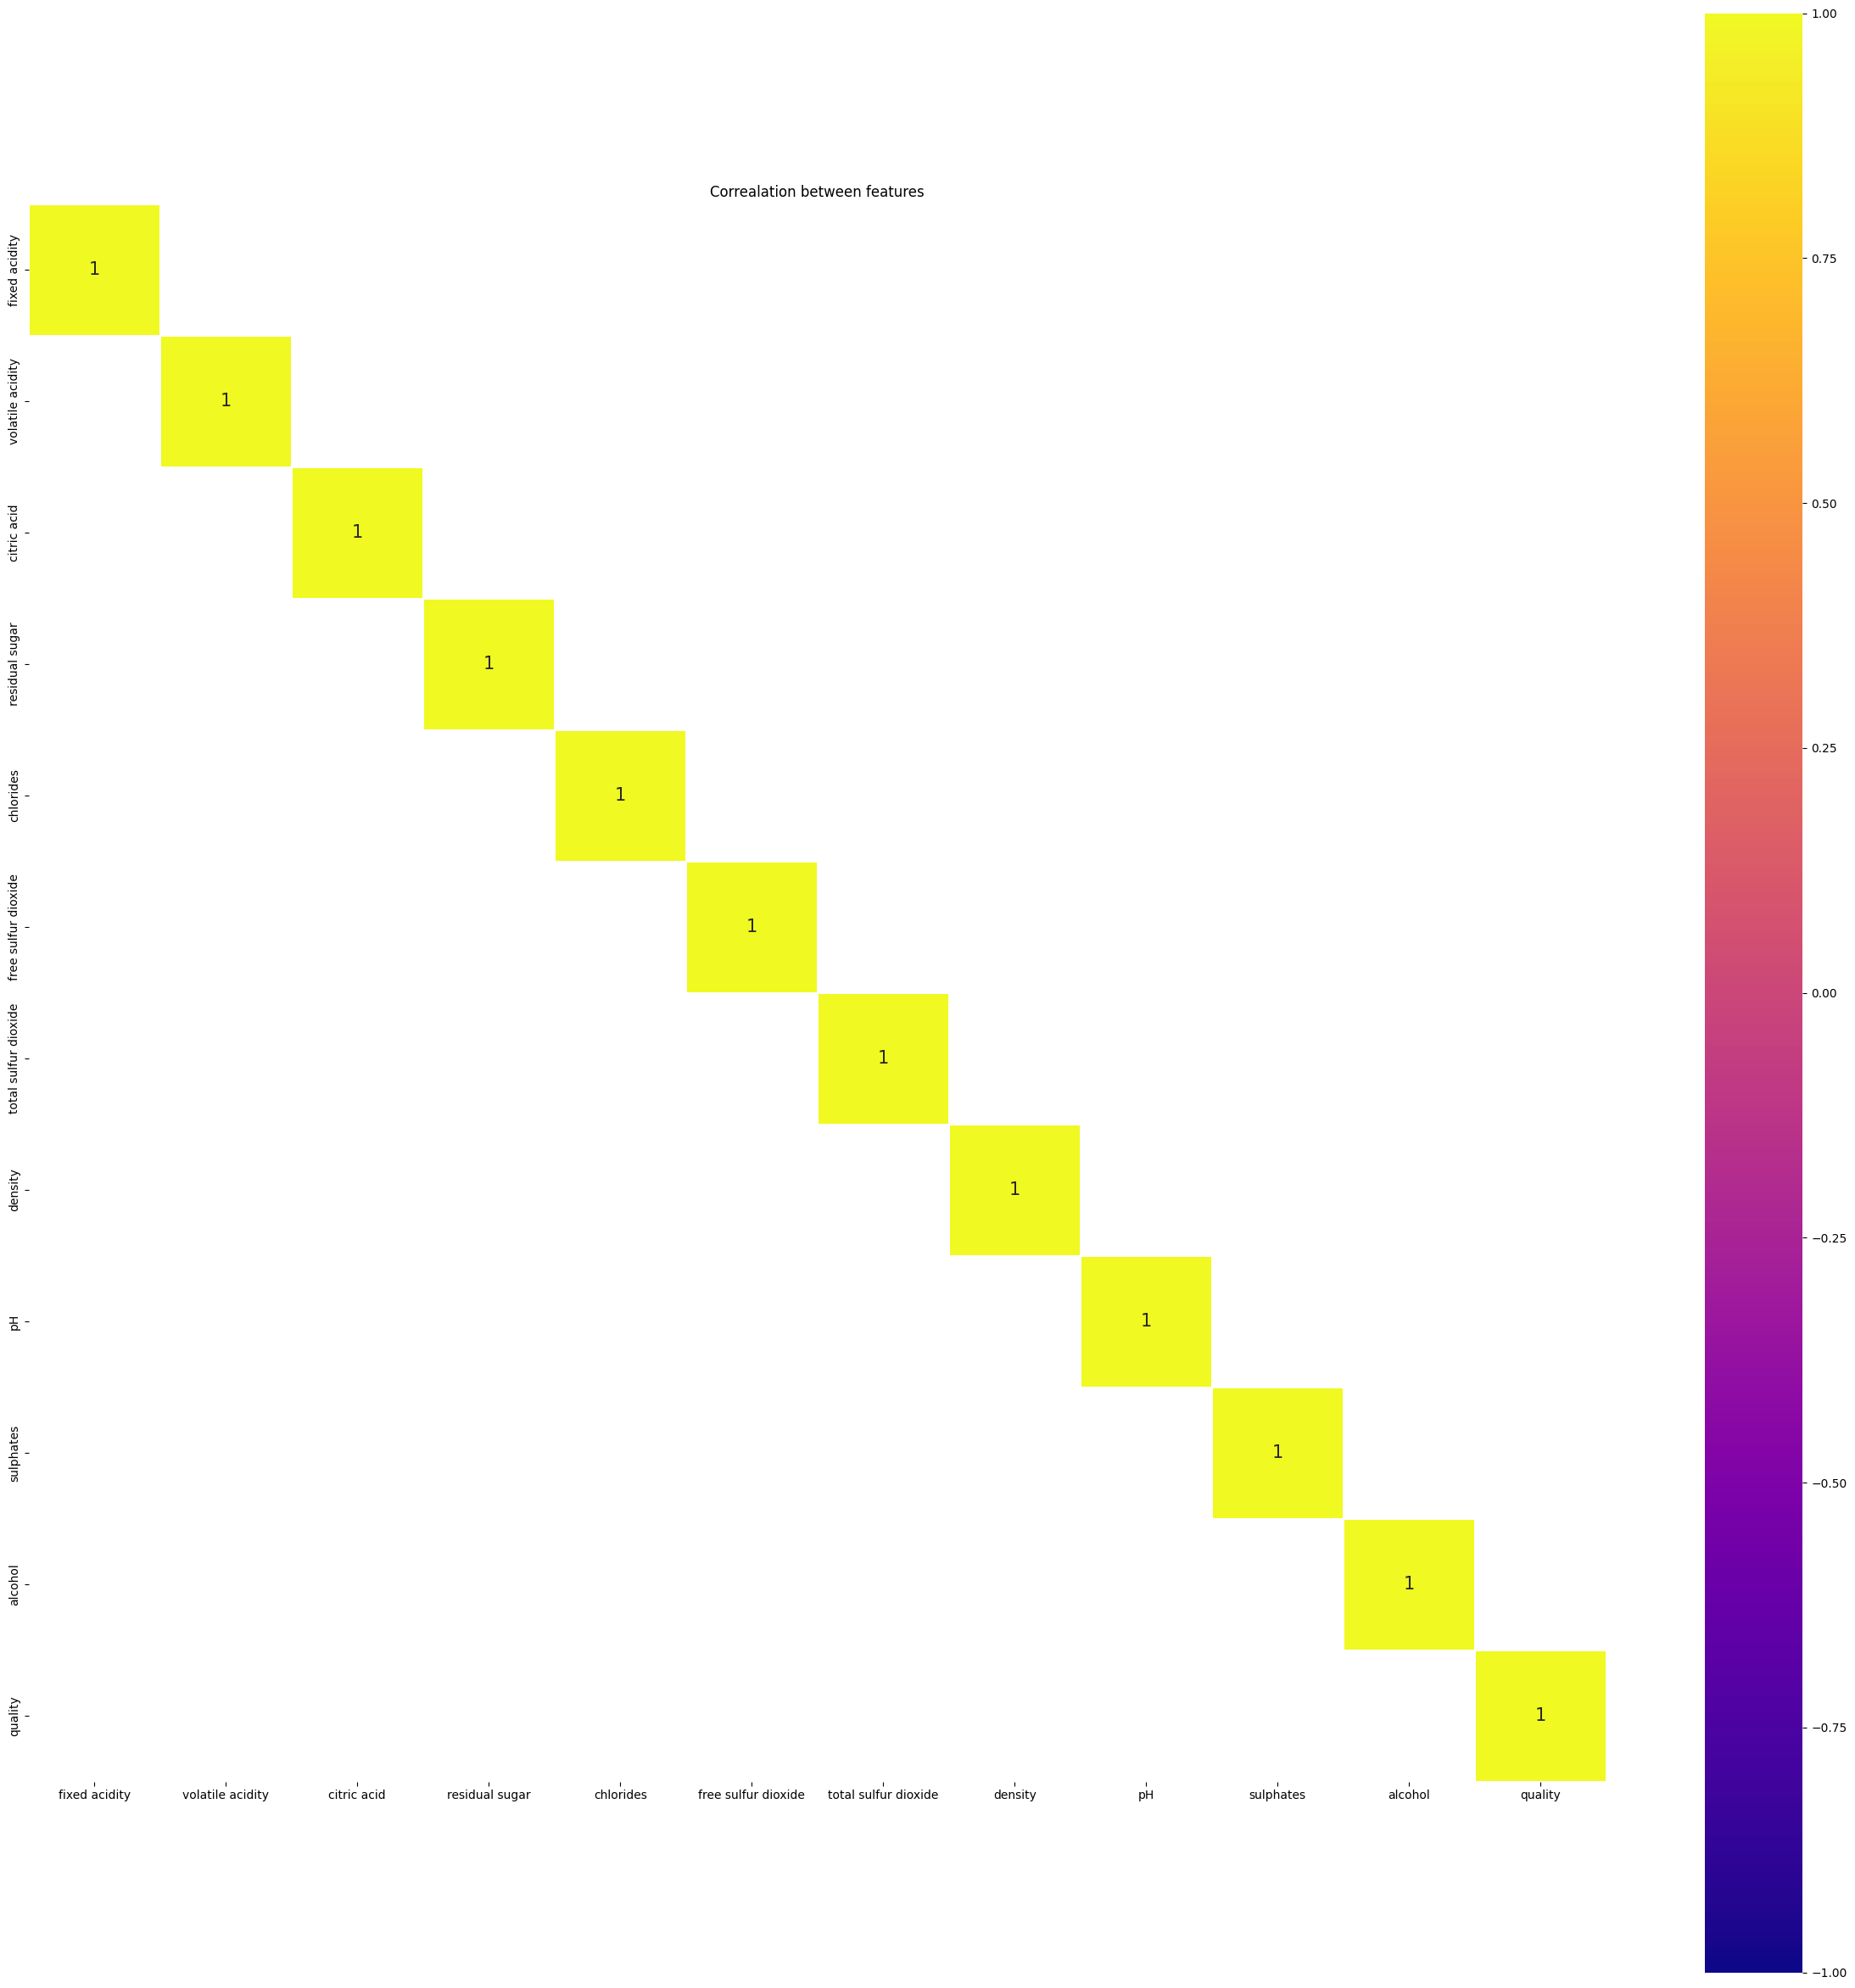

In [16]:
#Checking the high correlation between the numerical variables
plt.figure(figsize=(30,30))

sns.heatmap(df.corr()[(df.corr()>=0.75)|(df.corr()<=-0.75)],
           cmap='plasma',vmax=1.0,vmin=-1.0,annot=True,linewidth=0.1,
           annot_kws={'size':15},
           square=True);
plt.title('Correalation between features')
plt.show()

- No two columns are highly correlated

# Outlier Treatment

In [17]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ul=q3+1.5*iqr #upper limit
ll=q1-1.5*iqr  #lower limit

df_cleaned=df[~((df<(ll))|(df>(ul))).any(axis=1)]
df_cleaned

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [18]:
df_cleaned.shape

(1179, 12)

In [19]:
df.shape

(1599, 12)

In [20]:
df_cleaned['quality'].unique()

array([5, 6, 7, 4], dtype=int64)

# Scale the data

In [21]:
df_cleaned.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [22]:
df_num=df_cleaned.select_dtypes(include=np.number).drop('quality',axis=1)
df_num.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc=StandardScaler()
df_num_sc=sc.fit_transform(df_num)

df_num_sc=pd.DataFrame(df_num_sc,columns=df_num.columns)
df_num_sc.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764
1,-0.248346,2.174284,-1.375744,0.940570,1.356569,1.135446,0.947754,0.135771,-0.946440,0.419963,-0.571630
2,-0.248346,1.443297,-1.152735,0.259965,0.937312,-0.002316,0.449581,0.261343,-0.490773,0.161451,-0.571630
3,2.084173,-1.480652,1.746386,-0.647508,-0.250582,0.225236,0.679507,0.889206,-1.250217,-0.441743,-0.571630
4,-0.522760,1.077803,-1.375744,-0.647508,-0.180706,-0.457421,-0.316839,0.763633,1.407839,-0.614084,-0.986764


In [25]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd

pt = PowerTransformer(method='yeo-johnson')
df_num_sc = pt.fit_transform(df_num_sc)

# Reshape the target variable 'quality' to a 2D array
y = df_cleaned['quality'].values.reshape(-1, 1)

pt_y = PowerTransformer(method='yeo-johnson')
y_transformed = pt_y.fit_transform(y)

# Update the transformed values back to the dataframes
df_cleaned['quality'] = y_transformed
df_num_sc = pd.DataFrame(df_num_sc, columns=df_num.columns)




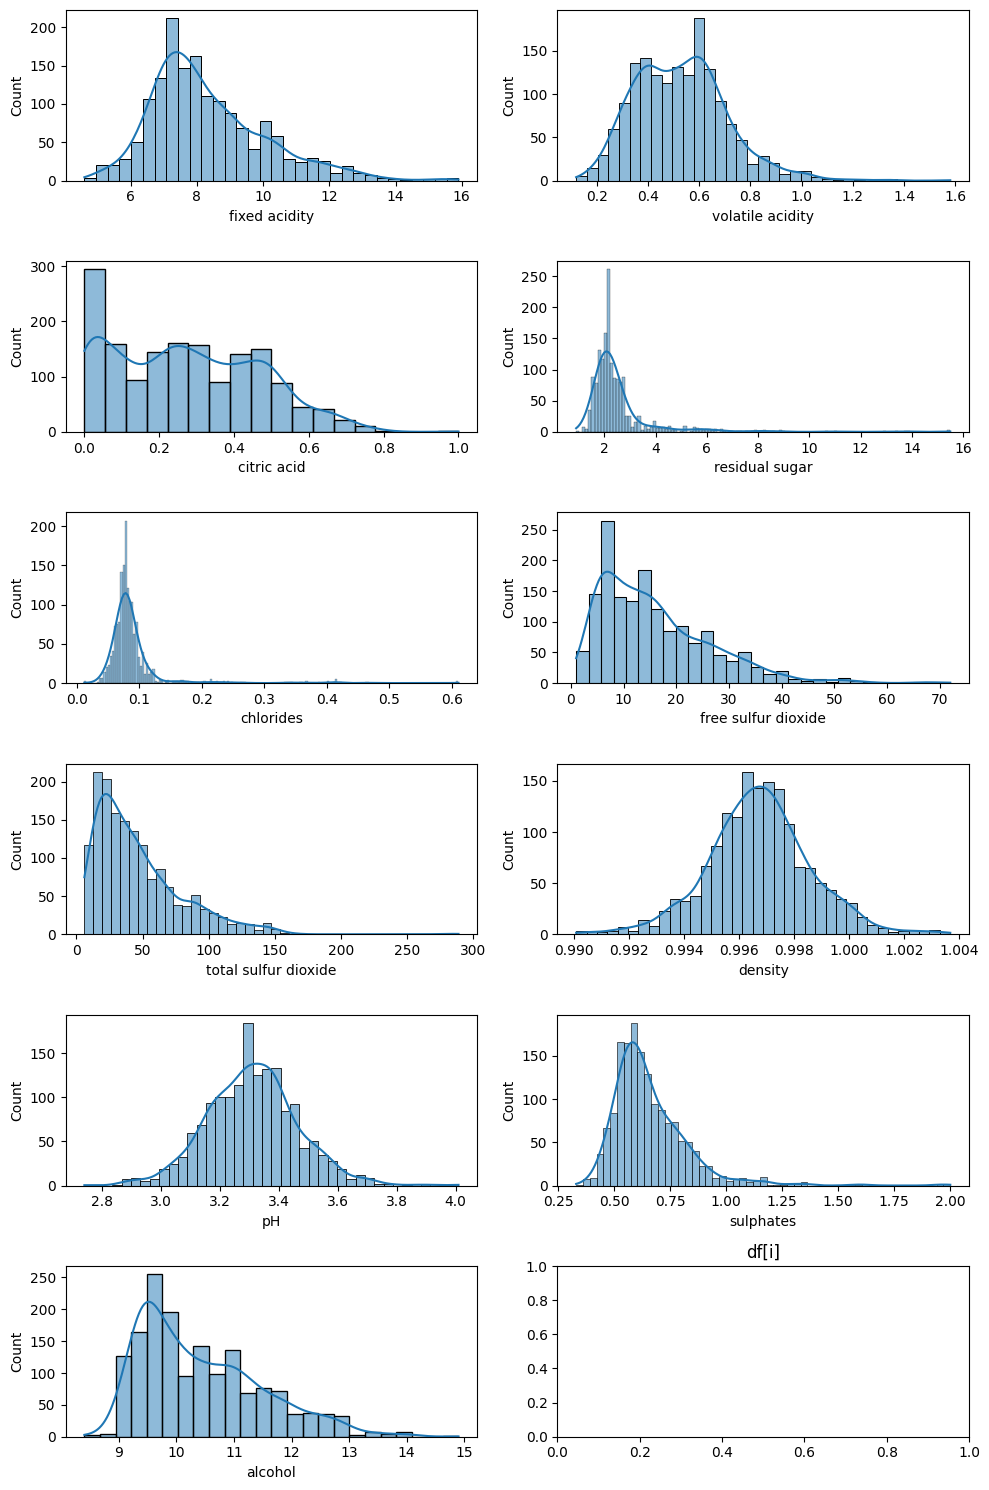

CPU times: total: 2.77 s
Wall time: 4.59 s


In [26]:
%%time
fig, ax= plt.subplots(6,2, figsize=(10,15))

for i, subplot in zip(df_num_sc, ax.flatten()):
    sns.histplot(df[i], ax=subplot,kde=True)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

# Modelling

In [27]:
#Step 1:Separate x and y
X=df_num_sc
y=df_cleaned['quality']

In [28]:
#Step 2: Split the data in train and test
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(825, 11)
(354, 11)
(825,)
(354,)


In [30]:
df_cleaned.shape
#825+354=1179 rows

(1179, 12)

In [31]:
#Step 3:Calling the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()

In [32]:
#Step 4: Fit the model
model_lr=lr.fit(X_train,y_train)

In [33]:
#Step 5:Use Prediction
pred_train=model_lr.predict(X_train)
pred_test=model_lr.predict(X_test)

r2_train=r2_score(y_train,pred_train)
r2_test=r2_score(y_test,pred_test)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

R2 Train:  0.37761965309236545
R2 Test:  0.3309605316729032


In [34]:
#Step 6:Model Performance of model
print("MSE Train: ",mean_squared_error(y_train,pred_train))
print("MSE Test: ",mean_squared_error(y_test,pred_test))

print("RMSE Train: ",np.sqrt(mean_squared_error(y_train,pred_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(y_test,pred_test)))


MSE Train:  0.6235254143462451
MSE Test:  0.6638369400666959
RMSE Train:  0.7896362544527987
RMSE Test:  0.8147618916387143


In [35]:
import statsmodels.api as sma

tempx=sma.add_constant(X)
xtrain,xtest,ytrain,ytest=train_test_split(tempx,y,test_size=0.30,random_state=1)

In [36]:
print('xtrain',xtrain.shape)
print('ytrain',ytrain.shape)

print('xtest',xtest.shape)
print('ytest',ytest.shape)

xtrain (825, 12)
ytrain (825,)
xtest (354, 12)
ytest (354,)


In [37]:
sma.add_constant(xtest)
#This constant will tell to calculate the intercept

,const,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
660,1.0,-0.434156,0.567771,-1.417472,-0.340479,-0.286582,-0.037553,0.077859,0.569180,1.174983,0.304924,-0.479875
548,1.0,1.231267,0.275907,0.055608,0.152812,0.069331,0.651076,0.813905,1.565282,-1.102190,-0.561149,-0.066384
1062,1.0,-1.207868,0.393826,-1.347739,-0.340479,-1.182610,1.925826,0.659863,-1.807284,0.203847,1.112292,1.261132
321,1.0,0.655857,0.452179,0.836979,0.374998,1.135284,-1.377269,-0.813137,1.259345,0.354590,-0.350011,0.175683
1054,1.0,-0.903684,0.681990,-1.347739,-0.609351,-0.000813,0.552745,-0.332854,0.345553,0.579670,1.046089,-0.479875
...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,0.596855,-0.669236,1.954135,0.152812,1.006481,-0.650417,0.255840,1.259345,1.617761,0.387352,0.389606
594,1.0,-0.434156,0.962249,-0.422141,-0.891123,-0.000813,-0.179398,0.124107,0.705364,1.322887,0.696153,-0.335573
1130,1.0,-1.637897,0.738621,-0.872447,0.782268,0.208013,0.221866,-0.564522,-0.752520,1.838174,0.132207,1.505925
54,1.0,1.085554,-1.278561,1.526400,0.782268,1.071008,1.373819,1.425578,1.136630,-0.329047,1.488545,-0.787118


In [38]:
xtrain = xtrain.reset_index(drop=True)
ytrain = ytrain.reset_index(drop=True)


In [39]:
model_ols=sma.OLS(ytrain,xtrain).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     42.66
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           4.33e-73
Time:                        18:21:21   Log-Likelihood:                -990.48
No. Observations:                 825   AIC:                             2005.
Df Residuals:                     813   BIC:                             2062.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0014      0.028      0.049      0.961      -0.054       0.057
fixed acidity            0.1347      0.069      1.947      0.052      -0.001       0.271
volatile acidity        -0.1908      0.041     -4.655      0.000      -0.271      -0.110
citric acid             -0.0827      0.049     -1.688      0.092      -0.179       0.013
residual sugar           0.0305      0.035      0.862      0.389      -0.039       0.100
chlorides               -0.0224      0.032     -0.704      0.481      -0.085       0.040
free sulfur dioxide      0.0809      0.047      1.724      0.085      -0.011       0.173
total sulfur dioxide    -0.0987      0.050     -1.973      0.049      -0.197      -0.001
density                 -0.1545      0.066     -2.342      0.019      -0.284      -0.025
pH                      -0.0488      0.049     -1.003      0.316      -0.144       0.047
sulphates                0.2732      0.032      8.432      0.000       0.210       0.337
alcohol                  0.2878      0.049      5.817      0.000       0.191       0.385
==============================================================================
Omnibus:                       18.207   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.655
Skew:                          -0.319   Prob(JB):                     5.40e-05
Kurtosis:                       3.405   Cond. No.                         6.28
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Are the Assumptions of Linear Regression met

## Linearity Test - Rainbow Test

### Linearity Assumption

#### H0:Data has Linear Relationship with the Target Variable


#### Ha:Data has non linear Relationship with Target Variable

In [40]:
test_statistic, p_value=sma.stats.linear_rainbow(model_ols)

print("Test Statistic:", test_statistic)
print("p-value:", p_value)

Test Statistic: 1.075386743489619
p-value: 0.23227055540366412


# Normality Test

### H0: Data/Residual are Normally distributed.

### Ha: Data/Residuals are not Normally distributed.

In [41]:
import statsmodels.api as sm
import scipy.stats as stats

jarque_bera_statistic, jarque_bera_p_value = stats.jarque_bera(model_ols.resid)

print("Jarque-Bera Statistic:", jarque_bera_statistic)
print("p-value:", jarque_bera_p_value)


Jarque-Bera Statistic: 19.654624537634067
p-value: 5.39575857653122e-05


# Checking the Multicollinearity

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Create a DataFrame with the same feature names as xtrain
vif_data = pd.DataFrame()
vif_data["Feature"] = xtrain.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(xtrain.values, i) for i in range(xtrain.shape[1])]

# Display the VIF values
print(vif_data)


                 Feature       VIF
0                  const  1.008121
1          fixed acidity  6.214432
2       volatile acidity  2.046605
3            citric acid  3.055947
4         residual sugar  1.552863
5              chlorides  1.294395
6    free sulfur dioxide  2.781978
7   total sulfur dioxide  3.157123
8                density  5.440901
9                     pH  3.115808
10             sulphates  1.323062
11               alcohol  3.075417


## Using Sequential Feature Selection method to select feature

In [43]:
import statsmodels.api as sm
import pandas as pd


alpha=0.05

p_values = model_ols.pvalues[1:]  # Exclude the constant term

while p_values.max() > alpha:
    # Find the feature with the highest p-value to remove
    feature_to_remove = p_values.idxmax()


    xtrain = xtrain.drop(columns=[feature_to_remove])

    # Re-fit the model
    xtrain_with_const = sm.add_constant(xtrain)
    model_ols = sm.OLS(ytrain, xtrain_with_const).fit()

    # Update the p-values
    p_values = model_ols.pvalues[1:]  # Exclude the constant term

# Get the selected features
selected_features = xtrain.columns
print(selected_features)


Index(['const', 'fixed acidity', 'volatile acidity', 'citric acid', 'density',
       'sulphates', 'alcohol'],
      dtype='object')


In [44]:
df_num_sc.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [45]:
df_cleaned.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [46]:
X1=df_num_sc[['fixed acidity', 'volatile acidity', 'citric acid', 'density','sulphates', 'alcohol']]
y1=df_cleaned['quality']

In [47]:
#Step 2: Split the data in train and test
from sklearn.model_selection import train_test_split

X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,test_size=0.30,random_state=42)

X1_train = X1_train.reset_index(drop=True)
y1_train = y1_train.reset_index(drop=True)


#Step 3:Calling the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

lr=LinearRegression()

#Step 4: Fit the model
model_lr=lr.fit(X1_train,y1_train)

#Step 5:Use Prediction
pred1_train=model_lr.predict(X1_train)
pred1_test=model_lr.predict(X1_test)

r2_train=r2_score(y1_train,pred1_train)
r2_test=r2_score(y1_test,pred1_test)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)

#Step 6:Model Performance of model
print("MSE Train: ",mean_squared_error(y1_train,pred1_train))
print("MSE Test: ",mean_squared_error(y1_test,pred1_test))

print("RMSE Train: ",np.sqrt(mean_squared_error(y1_train,pred1_train)))
print("RMSE Test: ",np.sqrt(mean_squared_error(y1_test,pred1_test)))


R2 Train:  0.37051530664084176
R2 Test:  0.3275583997351612
MSE Train:  0.6306428315122197
MSE Test:  0.6672126166331338
RMSE Train:  0.7941302358632492
RMSE Test:  0.8168308372197598


In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [49]:
LR = LinearRegression()

kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

# making it into 5 parts, shuffle --> is reshuffling it always
# for each fold it will calculate the mse and errors 
# and it will take the mean , tat will be the vias error
# 
rmse = cross_val_score(LR,X1,y1,cv = kf, scoring = 'neg_root_mean_squared_error' )

# pass X and then Y

In [50]:
print('Bias Error', np.mean(np.abs(rmse)))
print('Variance Error' , np.std(np.abs(rmse), ddof = 1))

Bias Error 0.8088546386530473
Variance Error 0.03505587726398383


In [51]:
%%time
import numpy as np

r2_scores = [1 - (rmse ** 2) for rmse in rmse]

# Calculate mean R2 scores for training and test data
mean_r2_train = np.mean(r2_scores)
mean_r2_test = mean_r2_train  # Since R2 is the same for training and test data

# Calculate mean RMSE for training and test data
mean_rmse_train = np.mean(np.abs(rmse))
mean_rmse_test = mean_rmse_train  # Since RMSE is the same for training and test data

print("Mean R2 Train:", mean_r2_train)
print("Mean R2 Test:", mean_r2_test)
print("Mean RMSE Train:", mean_rmse_train)
print("Mean RMSE Test:", mean_rmse_test)


Mean R2 Train: 0.34477104190485014
Mean R2 Test: 0.34477104190485014
Mean RMSE Train: 0.8088546386530473
Mean RMSE Test: 0.8088546386530473
CPU times: total: 0 ns
Wall time: 0 ns


**Lets Test this with a Different Model Like Random Forest**

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
#doing the RF with original data with all features
rfo=RandomForestRegressor()

# build the model and find the r2score with RMSE

rfo = rfo.fit(X_train,y_train)

pred_train_rfo = rfo.predict(X_train)

pred_test_rfo=rfo.predict(X_test)

In [54]:
r2_train=r2_score(y_train,pred_train_rfo)
r2_test=r2_score(y_test,pred_test_rfo)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)
# Mean Squared Error
# print("MSE Train :", mean_squared_error(ytrain,pred_train_rf))
# print("MSE Test  :", mean_squared_error(ytest,pred_test_rf))


print("RMSE Train :", np.sqrt(mean_squared_error(y_train,
                                                 pred_train_rfo)))

print("RMSE Test  :", np.sqrt(mean_squared_error(y_test,
                                                 pred_test_rfo)))

R2 Train:  0.9224567834106244
R2 Test:  0.39509473881415424
RMSE Train : 0.2787218723097778
RMSE Test  : 0.7747266924118502


# Random Forest

In [55]:
rf=RandomForestRegressor()

# build the model and find the r2score with RMSE

rf = rf.fit(X1_train,y1_train)

pred_train_rf = rf.predict(X1_train)

pred_test_rf=rf.predict(X1_test)

In [56]:
%%time
r2_train=r2_score(y1_train,pred_train_rf)
r2_test=r2_score(y1_test,pred_test_rf)

print("R2 Train: ",r2_train)
print("R2 Test: ",r2_test)
# Mean Squared Error
# print("MSE Train :", mean_squared_error(ytrain,pred_train_rf))
# print("MSE Test  :", mean_squared_error(ytest,pred_test_rf))


print("RMSE Train :", np.sqrt(mean_squared_error(y1_train,
                                                 pred_train_rf)))

print("RMSE Test  :", np.sqrt(mean_squared_error(y1_test,
                                                 pred_test_rf)))

R2 Train:  0.9194903877538484
R2 Test:  0.3462670788043857
RMSE Train : 0.28400305525281244
RMSE Test  : 0.8053877441428189
CPU times: total: 0 ns
Wall time: 4.14 ms


# Grid Search CV

In [57]:
%%time
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X1_train, y1_train)

best_rf = grid_search.best_estimator_



CPU times: total: 1min 45s
Wall time: 2min 28s


In [58]:
print(best_rf)

RandomForestRegressor(max_depth=20, min_samples_leaf=2)


In [59]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(max_depth=20, n_estimators=50)

# Fit the model to your training data
best_rf.fit(X1_train, y1_train)

# Make predictions
pred_train_rf = best_rf.predict(X1_train)
pred_test_rf = best_rf.predict(X1_test)

# Evaluate the model with R-squared and RMSE
r2_train = r2_score(y1_train, pred_train_rf)
r2_test = r2_score(y1_test, pred_test_rf)

print("R2 Train:", r2_train)
print("R2 Test:", r2_test)

rmse_train = np.sqrt(mean_squared_error(y1_train, pred_train_rf))
rmse_test = np.sqrt(mean_squared_error(y1_test, pred_test_rf))

print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)


R2 Train: 0.9161957316237105
R2 Test: 0.3359766736133981
RMSE Train: 0.28975585083885025
RMSE Test: 0.8117017951353189
CPU times: total: 562 ms
Wall time: 695 ms


In [60]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define a parameter grid for GridSearchCV
param_grid = {
    'max_depth': [10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}

# Create a RandomForestRegressor
rf = RandomForestRegressor()

# Perform GridSearchCV to fine-tune hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='r2')
grid_search.fit(X1_train, y1_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Fit the model
best_rf.fit(X1_train, y1_train)

# Evaluate the model
r2_test = best_rf.score(X1_test, y1_test)
print("Best R2 Test:", r2_test)

best_max_depth = best_rf.get_params()['max_depth']
best_min_samples_leaf = best_rf.get_params()['min_samples_leaf']
best_n_estimators = best_rf.get_params()['n_estimators']

print("Best max_depth:", best_max_depth)
print("Best min_samples_leaf:", best_min_samples_leaf)
print("Best n_estimators:", best_n_estimators)



Best R2 Test: 0.3425450079330886
Best max_depth: 20
Best min_samples_leaf: 2
Best n_estimators: 300
CPU times: total: 3min 1s
Wall time: 4min 34s


In [61]:
%%time
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with the best hyperparameters
best_rf = RandomForestRegressor(max_depth=20, n_estimators=200,min_samples_leaf=1)

# Fit the model to your training data
best_rf.fit(X1_train, y1_train)

# Make predictions
pred_train_rf = best_rf.predict(X1_train)
pred_test_rf = best_rf.predict(X1_test)

# Evaluate the model with R-squared and RMSE
r2_train = r2_score(y1_train, pred_train_rf)
r2_test = r2_score(y1_test, pred_test_rf)

print("R2 Train:", r2_train)
print("R2 Test:", r2_test)

rmse_train = np.sqrt(mean_squared_error(y1_train, pred_train_rf))
rmse_test = np.sqrt(mean_squared_error(y1_test, pred_test_rf))

print("RMSE Train:", rmse_train)
print("RMSE Test:", rmse_test)


R2 Train: 0.9207387889141007
R2 Test: 0.3362387888727707
RMSE Train: 0.2817925431944602
RMSE Test: 0.8115415745389076
CPU times: total: 2 s
Wall time: 2.95 s


RMSE is a measure of the average deviation of the predicted values from the actual values. It provides a way to measure the model's prediction accuracy in the same units as the target variable. Smaller RMSE values indicate better model performance.